In [171]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import svm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

cpy_tweet = pd.read_csv('dataset/Company_Tweet.csv')
tweets = pd.read_csv('dataset/filtered_tweets.csv')
company = pd.read_csv('dataset/Company.csv')

In [273]:
amzn_stock = pd.read_csv('dataset/amzn_stock.csv')
apple_stock = pd.read_csv('dataset/apple_stock.csv')
google_stock = pd.read_csv('dataset/google_stock.csv')
microsoft_stock = pd.read_csv('dataset/microsoft_stock.csv')
tesla_stock = pd.read_csv('dataset/tesla_stock.csv')

amzn_tweet = pd.read_csv('dataset/EDA_amazon_tweets.csv')
apple_tweet = pd.read_csv('dataset/EDA_apple_tweets.csv')
google_tweet = pd.read_csv('dataset/EDA_google_tweets.csv')
microsoft_tweet = pd.read_csv('dataset/EDA_microsoft_tweets.csv')
tesla_tweet = pd.read_csv('dataset/EDA_tesla_tweets.csv')



In [324]:
amzn_tweet = amzn_tweet.loc[:, ~amzn_tweet.columns.str.contains('^Unnamed')]
apple_tweet = apple_tweet.loc[:, ~apple_tweet.columns.str.contains('^Unnamed')]
google_tweet = google_tweet.loc[:, ~google_tweet.columns.str.contains('^Unnamed')]
microsoft_tweet = microsoft_tweet.loc[:, ~microsoft_tweet.columns.str.contains('^Unnamed')]
tesla_tweet = tesla_tweet.loc[:, ~tesla_tweet.columns.str.contains('^Unnamed')]

amzn_stock = amzn_stock.loc[:, ~amzn_stock.columns.str.contains('^Unnamed')]
apple_stock = apple_stock.loc[:, ~apple_stock.columns.str.contains('^Unnamed')]
google_stock = google_stock.loc[:, ~google_stock.columns.str.contains('^Unnamed')]
microsoft_stock = microsoft_stock.loc[:, ~microsoft_stock.columns.str.contains('^Unnamed')]
tesla_stock = tesla_stock.loc[:, ~tesla_stock.columns.str.contains('^Unnamed')]


In [325]:
company

,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc
2,GOOGL,Google Inc
3,AMZN,Amazon.com
4,TSLA,Tesla Inc
5,MSFT,Microsoft


In [326]:
tweets.head()

,Unnamed: 0,tweet_id,writer,Date,body,comment_num,retweet_num,like_num,ticker_symbol,tidy_tweet
0,3935144,1145483574717497344,muckdog,2019-07-01,Had an interesting conversation with friends y...,0,1,0,AMZN,interesting conversation with friends yesterda...
1,3937498,1145844868457095168,lockingprofits,2019-07-02,"$amzn run about to start, are u on board? Prim...",0,1,2,AMZN,amzn about start board Prime will here before ...
2,3940653,1146207985888313345,livebutlearn,2019-07-03,Markets looking to go up higher most stocks ar...,0,0,0,AMZN,Markets looking higher most stocks super bulli...
3,3943543,1146573195585175557,pjl001,2019-07-04,"Coca-Cola Gets Good News, Monster Beverage Get...",0,1,0,AMZN,Coca Cola Gets Good News Monster Beverage Gets...
4,3945591,1147188907886485504,TheBurdetteLawF,2019-07-05,#estate asset watch - most active options on F...,0,0,1,AMZN,#estate asset watch most active options Friday...


In [327]:
cpy_tweet.head()

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


In [328]:
amzn_stock.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-07-01,96.490997,95.733002,96.149002,96.109497,63842000,96.109497
1,2019-07-02,96.739502,95.331497,95.969002,96.715500,52918000,96.715500
2,2019-07-03,97.079498,96.525002,96.794502,96.949997,33806000,96.949997
3,2019-07-05,97.294998,96.264999,96.430000,97.145500,52568000,97.145500
4,2019-07-08,97.800003,96.412498,96.706001,97.615997,57668000,97.615997


In [329]:
apple_stock.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-07-01,51.122501,50.162498,50.792500,50.387501,109012000.0,49.029461
1,2019-07-02,50.782501,50.340000,50.352501,50.682499,67740800.0,49.316505
2,2019-07-03,51.110001,50.672501,50.820000,51.102501,45448000.0,49.725197
3,2019-07-05,51.270000,50.724998,50.837502,51.057499,69062000.0,49.681393
4,2019-07-08,50.349998,49.602501,50.202499,50.005001,101354400.0,48.657265


In [330]:
google_stock.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-07-01,55.429501,54.766499,55.051998,55.000000,29196000,55.000000
1,2019-07-02,55.644501,54.983501,55.241501,55.630001,20630000,55.630001
2,2019-07-03,56.399502,55.742500,55.924999,56.149502,20154000,56.149502
3,2019-07-05,56.732498,55.875000,55.968498,56.633499,29794000,56.633499
4,2019-07-08,56.360500,55.588001,56.293499,55.839500,29888000,55.839500


In [331]:
microsoft_stock.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-07-01,136.699997,134.970001,136.630005,135.679993,22613500.0,131.022095
1,2019-07-02,136.589996,135.339996,136.119995,136.580002,15237800.0,131.891220
2,2019-07-03,137.740005,136.289993,136.800003,137.460007,13629300.0,132.740997
3,2019-07-05,137.330002,135.720001,135.940002,137.059998,18141100.0,132.354706
4,2019-07-08,137.100006,135.369995,136.399994,136.960007,16779700.0,132.258194


In [332]:
tesla_stock.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-07-01,15.540000,15.085333,15.347333,15.144667,123201000,15.144667
1,2019-07-02,15.276667,14.814667,15.259333,14.970000,138885000,14.970000
2,2019-07-03,16.104668,15.634000,15.959333,15.660000,213016500,15.660000
3,2019-07-05,15.696667,15.386667,15.638000,15.540000,105985500,15.540000
4,2019-07-08,15.483333,15.244000,15.416000,15.356000,88207500,15.356000


In [333]:
amzn_stock.describe()

,High,Low,Open,Close,Volume,Adj Close
count,128.000000,128.000000,128.000000,128.000000,1.280000e+02,128.000000
mean,91.238039,89.907613,90.662309,90.617902,6.323112e+07,90.617902
std,3.954108,3.910021,3.932296,3.957037,2.268687e+07,3.957037
min,86.250000,84.252998,84.877502,85.275497,1.762600e+07,85.275497
25%,88.608252,87.269377,88.051752,88.061623,5.006850e+07,88.061623
50%,89.918751,88.856251,89.571003,89.382751,5.783400e+07,89.382751
75%,92.049376,90.757250,91.411877,91.586748,7.076700e+07,91.586748
max,101.790001,100.193497,101.280998,101.049500,1.925280e+08,101.049500


In [334]:
apple_stock.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-07-01,51.122501,50.162498,50.792500,50.387501,109012000.0,49.029461
1,2019-07-02,50.782501,50.340000,50.352501,50.682499,67740800.0,49.316505
2,2019-07-03,51.110001,50.672501,50.820000,51.102501,45448000.0,49.725197
3,2019-07-05,51.270000,50.724998,50.837502,51.057499,69062000.0,49.681393
4,2019-07-08,50.349998,49.602501,50.202499,50.005001,101354400.0,48.657265


In [335]:
google_stock.describe()

,High,Low,Open,Close,Volume,Adj Close
count,128.000000,128.000000,128.000000,128.000000,1.280000e+02,128.000000
mean,62.286242,61.405695,61.809906,61.862262,2.742192e+07,61.862262
std,3.473300,3.540934,3.509180,3.489669,1.187991e+07,3.489669
min,55.429501,54.766499,55.051998,55.000000,1.280200e+07,55.000000
25%,59.870876,58.645001,59.235624,59.160748,2.080400e+07,59.160748
50%,62.018251,61.087000,61.375000,61.537750,2.540100e+07,61.537750
75%,65.375626,64.554998,64.841877,64.873873,3.018500e+07,64.873873
max,68.352501,67.650002,68.199997,68.123497,1.212160e+08,68.123497


In [336]:
microsoft_stock.describe()

,High,Low,Open,Close,Volume,Adj Close
count,128.000000,128.000000,128.000000,128.000000,1.280000e+02,128.000000
mean,143.110781,141.130078,142.287344,142.209375,2.291645e+07,137.788017
std,6.691844,7.022202,6.760411,6.921072,7.266982e+06,6.960029
min,133.929993,130.779999,133.300003,132.210007,8.989200e+06,127.671219
25%,138.342506,136.267502,137.177502,137.210003,1.780732e+07,132.841473
50%,140.324997,138.224998,139.625000,139.120003,2.142130e+07,134.771988
75%,147.780006,146.372498,146.810005,147.497498,2.543070e+07,142.908195
max,159.550003,158.220001,159.449997,158.960007,5.347750e+07,154.538132


In [337]:
tesla_stock.describe()

,High,Low,Open,Close,Volume,Adj Close
count,128.000000,128.000000,128.000000,128.000000,1.280000e+02,128.000000
mean,18.921917,18.355068,18.611859,18.673776,1.244222e+08,18.673776
std,4.068557,3.968324,3.993330,4.040021,6.606942e+07,4.040021
min,14.334667,14.066667,14.240000,14.093333,3.698400e+07,14.093333
25%,15.714167,15.228667,15.436334,15.556000,8.101012e+07,15.556000
50%,16.819333,16.324333,16.495000,16.499666,1.081882e+08,16.499666
75%,22.504000,21.906667,22.178167,22.202167,1.402084e+08,22.202167
max,29.020666,28.423332,29.000000,28.729334,4.500915e+08,28.729334


Line graph of Adjacent Close with respect to Date for all Stocks

Text(0.5, 1.0, 'AMAZON DATE VS ADJ CLOSE')

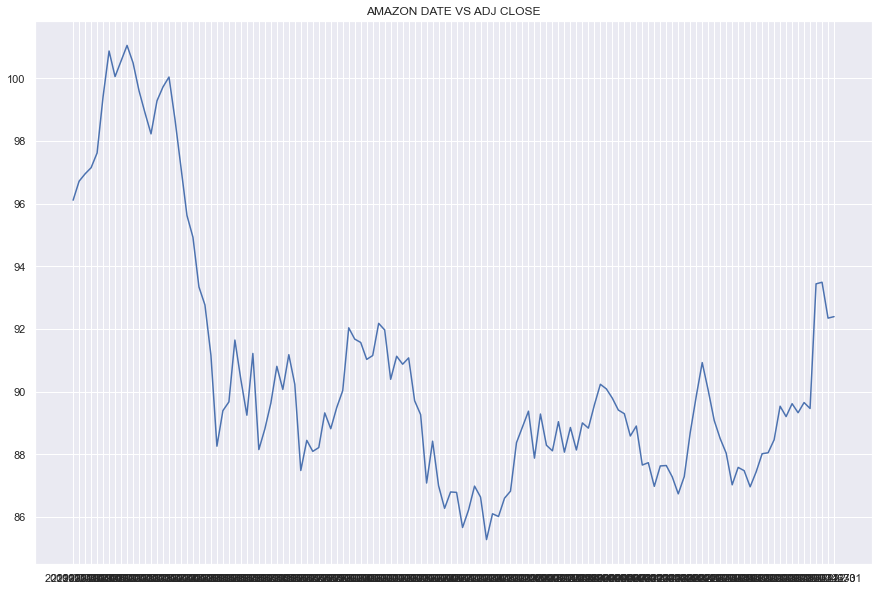

In [338]:
plt.figure(figsize=(15,10))
df=amzn_stock
plt.plot(amzn_stock['Date'],amzn_stock['Adj Close'])
plt.title('AMAZON DATE VS ADJ CLOSE')

Text(0.5, 1.0, 'APPLE DATE VS ADJ CLOSE')

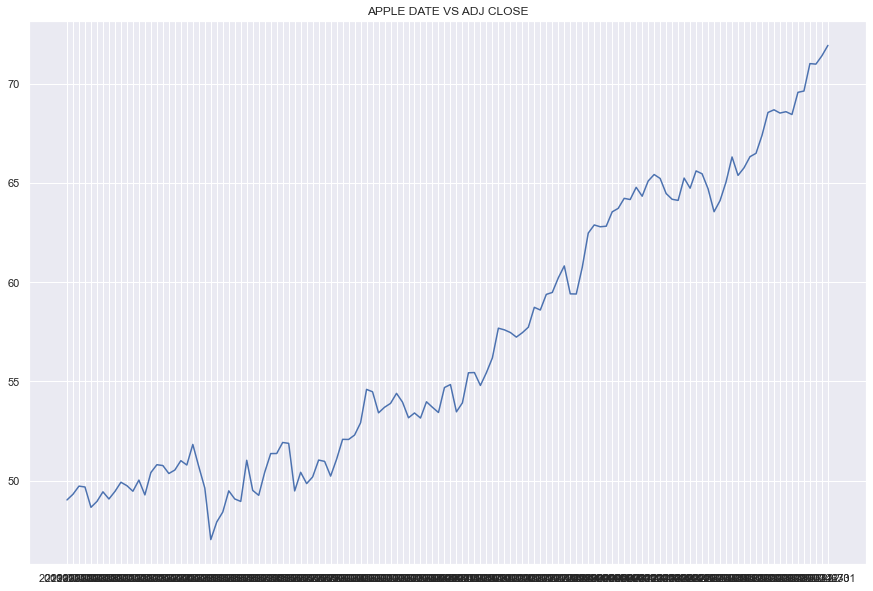

In [339]:
plt.figure(figsize=(15,10))
df=apple_stock
plt.plot(apple_stock['Date'],apple_stock['Adj Close'])
plt.title('APPLE DATE VS ADJ CLOSE')

Text(0.5, 1.0, 'GOOGLE DATE VS ADJ CLOSE')

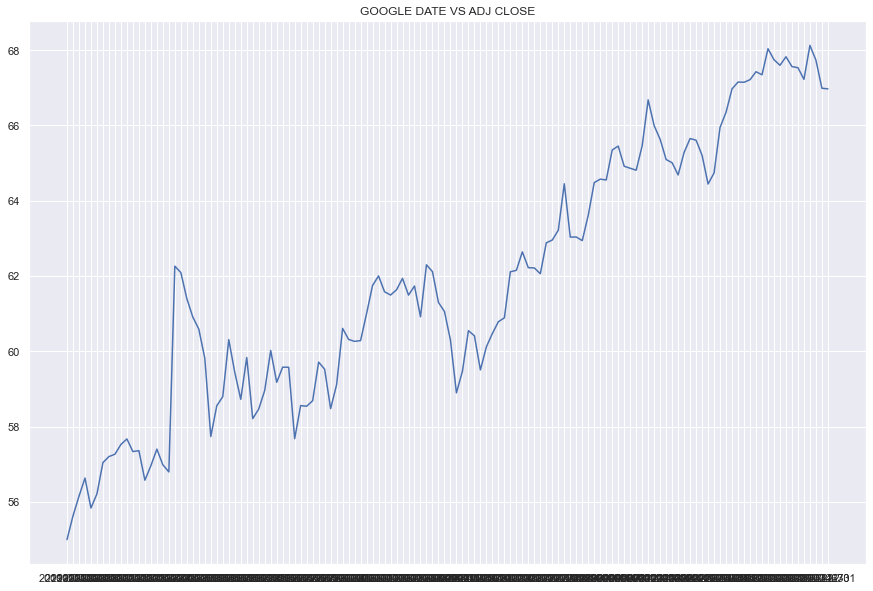

In [340]:
plt.figure(figsize=(15,10))
df=google_stock
plt.plot(google_stock['Date'],google_stock['Adj Close'])
plt.title('GOOGLE DATE VS ADJ CLOSE')

Text(0.5, 1.0, 'MICROSOFT DATE VS ADJ CLOSE')

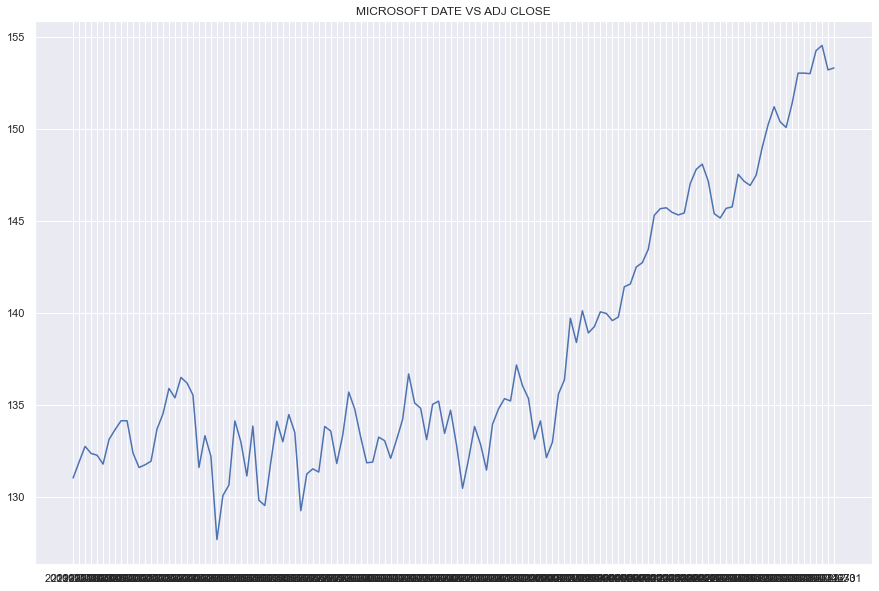

In [341]:
plt.figure(figsize=(15,10))
df=microsoft_stock
plt.plot(microsoft_stock['Date'],microsoft_stock['Adj Close'])
plt.title('MICROSOFT DATE VS ADJ CLOSE')

Text(0.5, 1.0, 'TESLA DATE VS ADJ CLOSE')

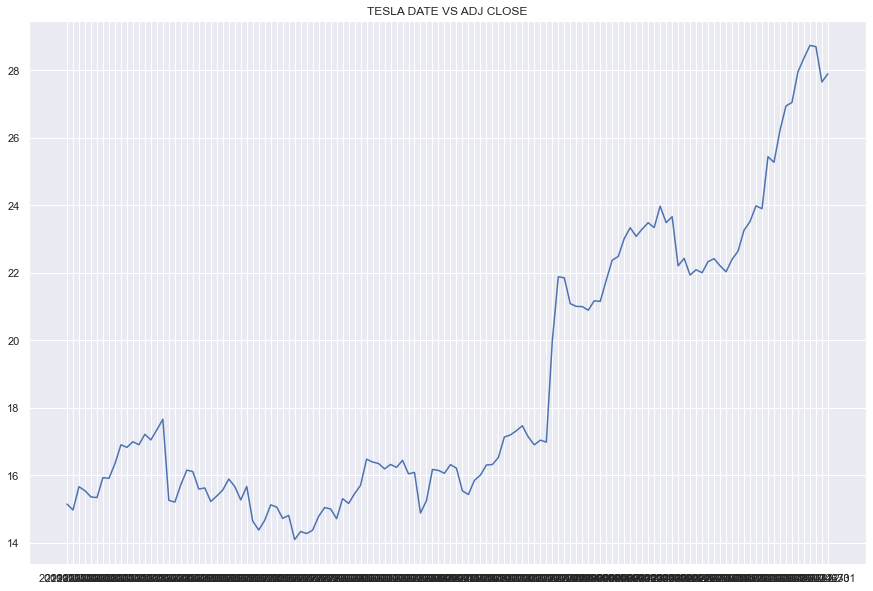

In [342]:
plt.figure(figsize=(15,10))
df=tesla_stock
plt.plot(tesla_stock['Date'],tesla_stock['Adj Close'])
plt.title('TESLA DATE VS ADJ CLOSE')

Line graph of Volume with respect to Date for all Stocks

Text(0.5, 1.0, 'AMAZON DATE VS Volume')

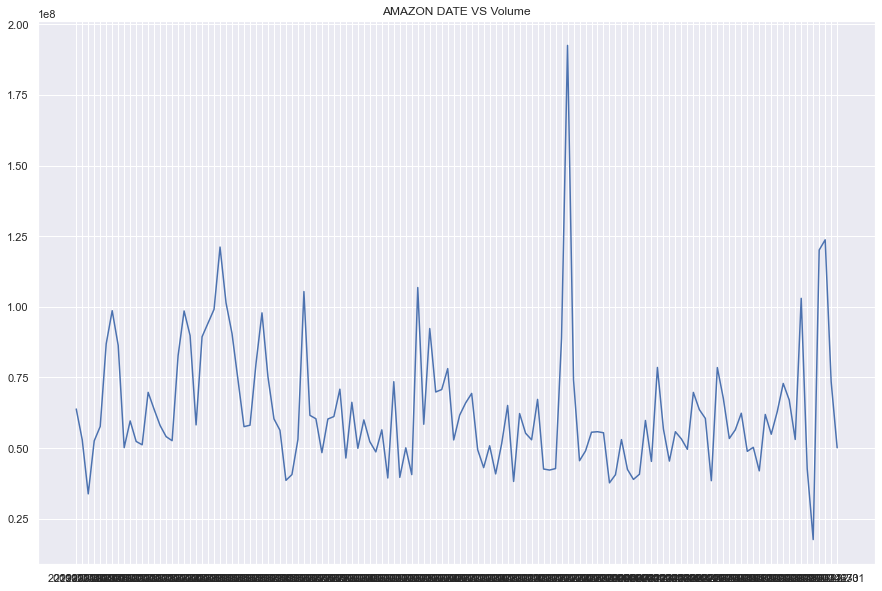

In [343]:
plt.figure(figsize=(15,10))
df=amzn_stock
plt.plot(amzn_stock['Date'],amzn_stock['Volume'])
plt.title('AMAZON DATE VS Volume')

Text(0.5, 1.0, 'APPLE DATE VS Volume')

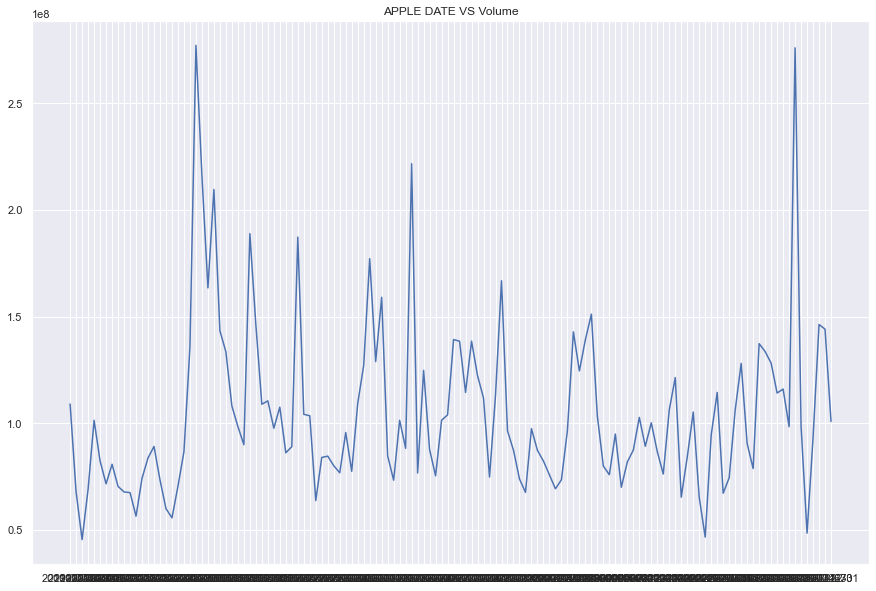

In [344]:
plt.figure(figsize=(15,10))
plt.plot(apple_stock['Date'],apple_stock['Volume'])
plt.title('APPLE DATE VS Volume')

Text(0.5, 1.0, 'GOOGLE DATE VS Volume')

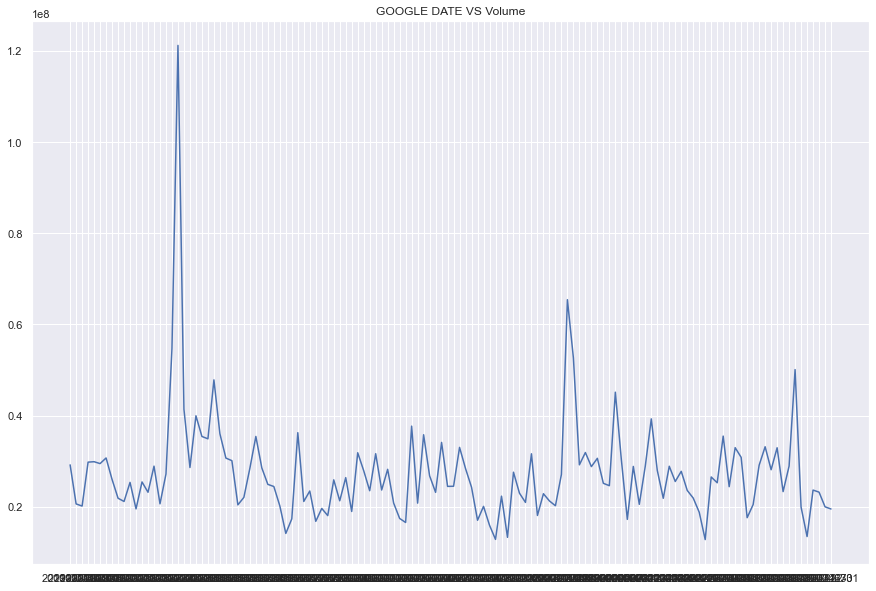

In [345]:
plt.figure(figsize=(15,10))
plt.plot(google_stock['Date'],google_stock['Volume'])
plt.title('GOOGLE DATE VS Volume')

Text(0.5, 1.0, 'MICROSOFT DATE VS Volume')

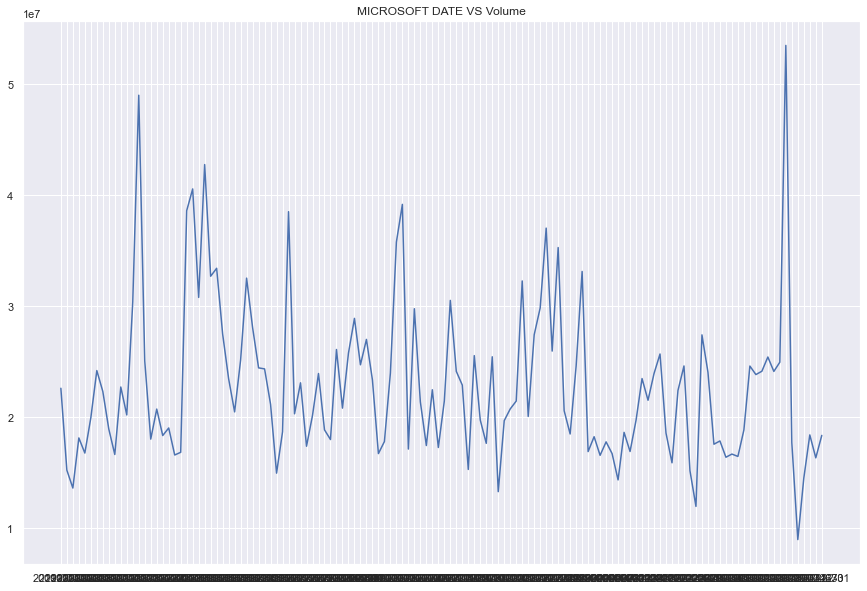

In [346]:
plt.figure(figsize=(15,10))
plt.plot(microsoft_stock['Date'],microsoft_stock['Volume'])
plt.title('MICROSOFT DATE VS Volume')

Text(0.5, 1.0, 'TESLA DATE VS Volume')

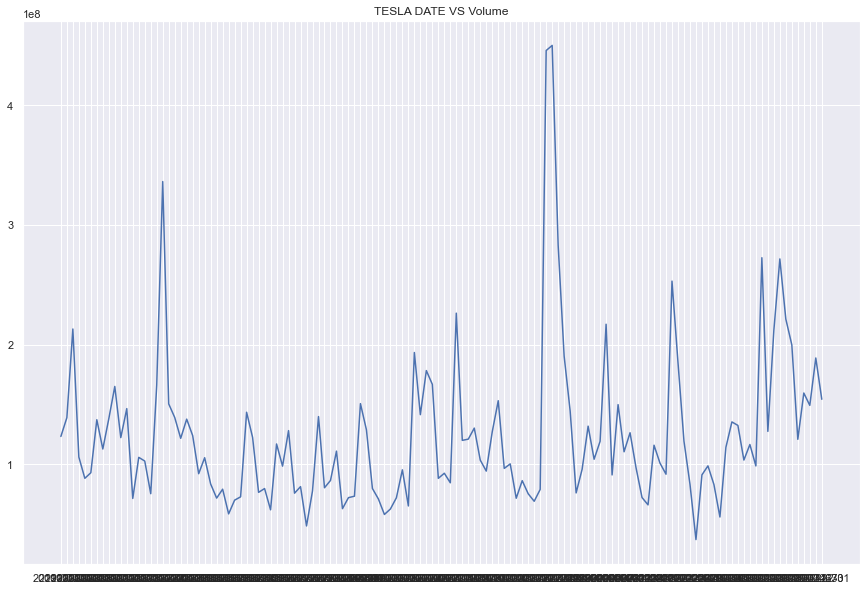

In [347]:
plt.figure(figsize=(15,10))
plt.plot(tesla_stock['Date'],tesla_stock['Volume'])
plt.title('TESLA DATE VS Volume')

ScatterPlot of Adj Close with respect to Volume for all Stocks

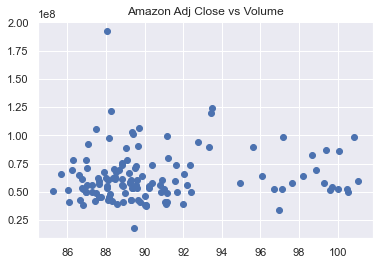

In [376]:
plt.scatter(amzn_stock['Adj Close'],amzn_stock['Volume'])
plt.title("Amazon Adj Close vs Volume")
plt.show()

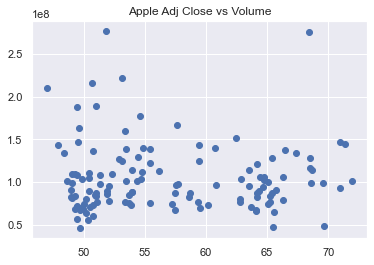

In [375]:
plt.scatter(apple_stock['Adj Close'],apple_stock['Volume'])
plt.title("Apple Adj Close vs Volume")
plt.show()

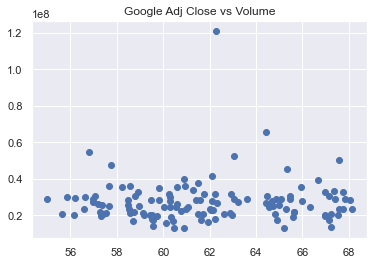

In [377]:
plt.scatter(google_stock['Adj Close'],google_stock['Volume'])
plt.title("Google Adj Close vs Volume")
plt.show()

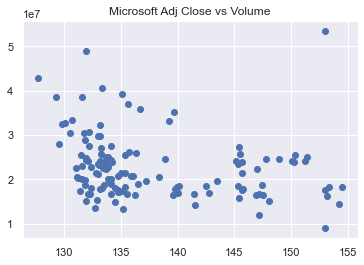

In [378]:
plt.scatter(microsoft_stock['Adj Close'],microsoft_stock['Volume'])
plt.title("Microsoft Adj Close vs Volume")
plt.show()

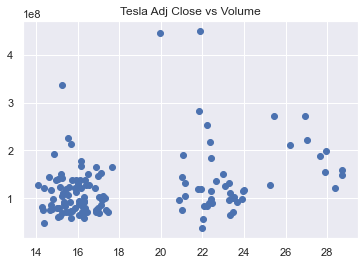

In [379]:
plt.scatter(tesla_stock['Adj Close'],tesla_stock['Volume'])
plt.title("Tesla Adj Close vs Volume")
plt.show()

Excluding google all the stocks have their maximum volume traded on their lower prices so this tells that even if the tweets impact the price at their high price people are less likely to trade in that.

Scatter Matrix for all the stocks

In [353]:
def ScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) 
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] 
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter plot and Density Plot')
    plt.show()

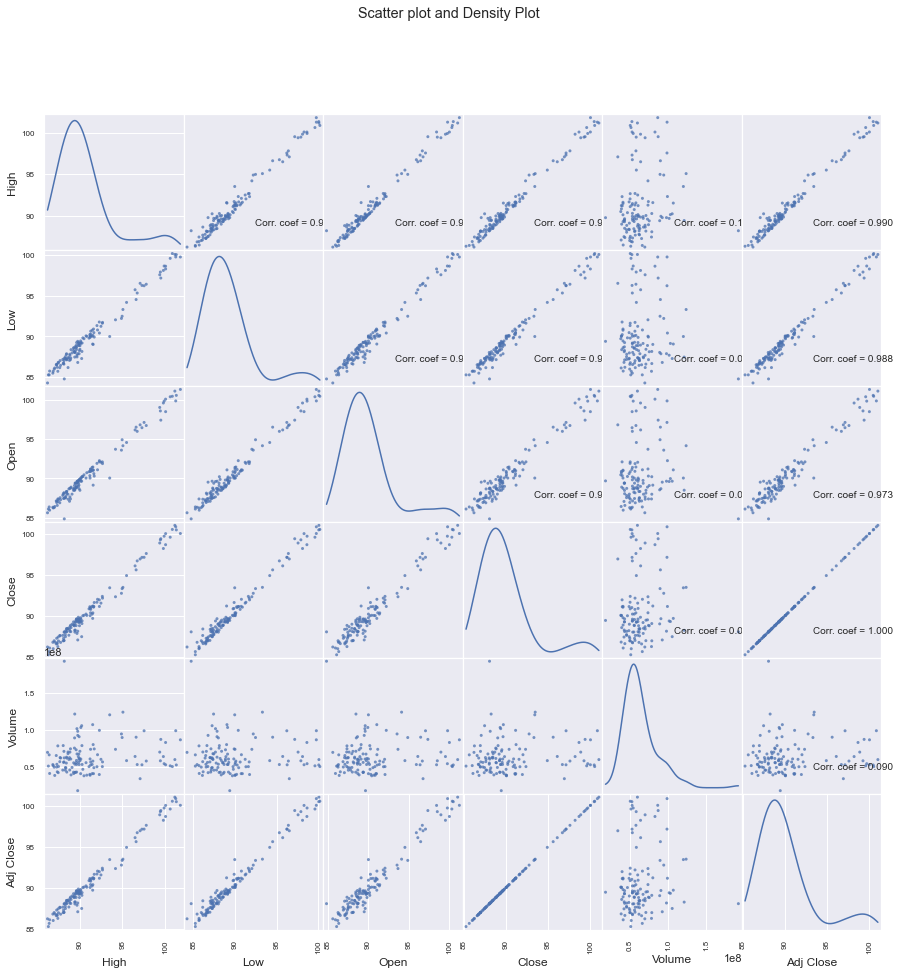

In [354]:
ScatterMatrix(amzn_stock, 15, 10)

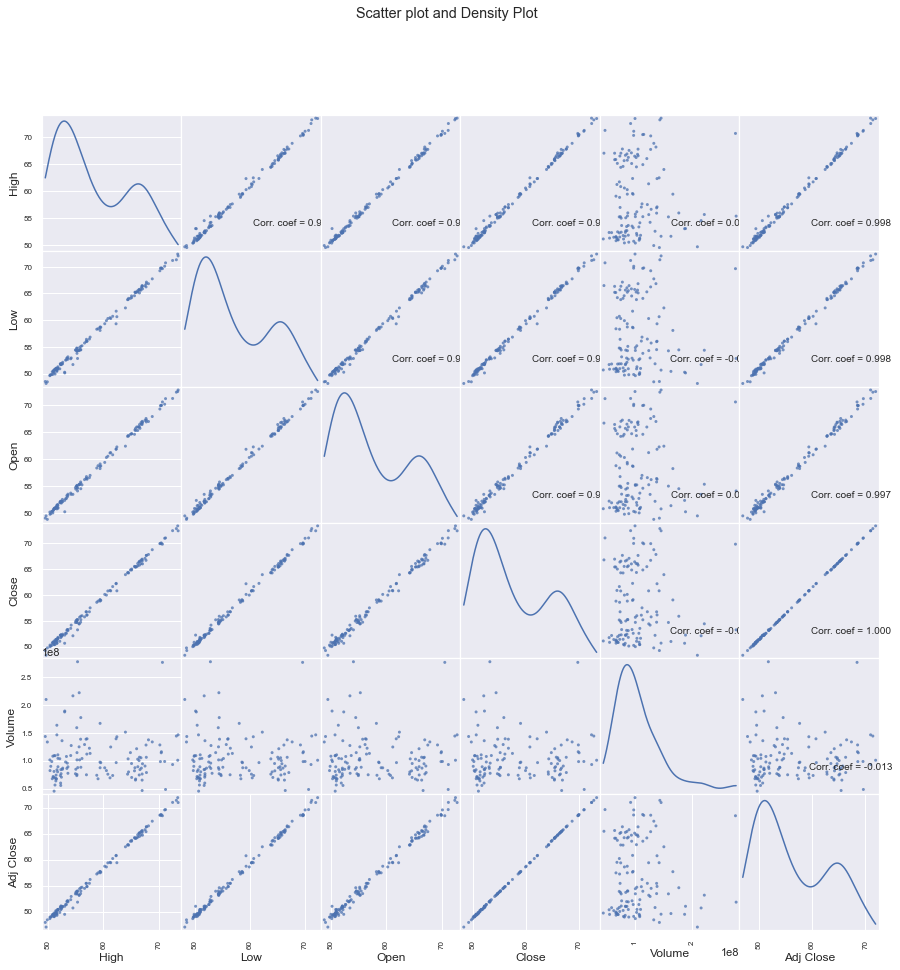

In [355]:
ScatterMatrix(apple_stock, 15, 10)

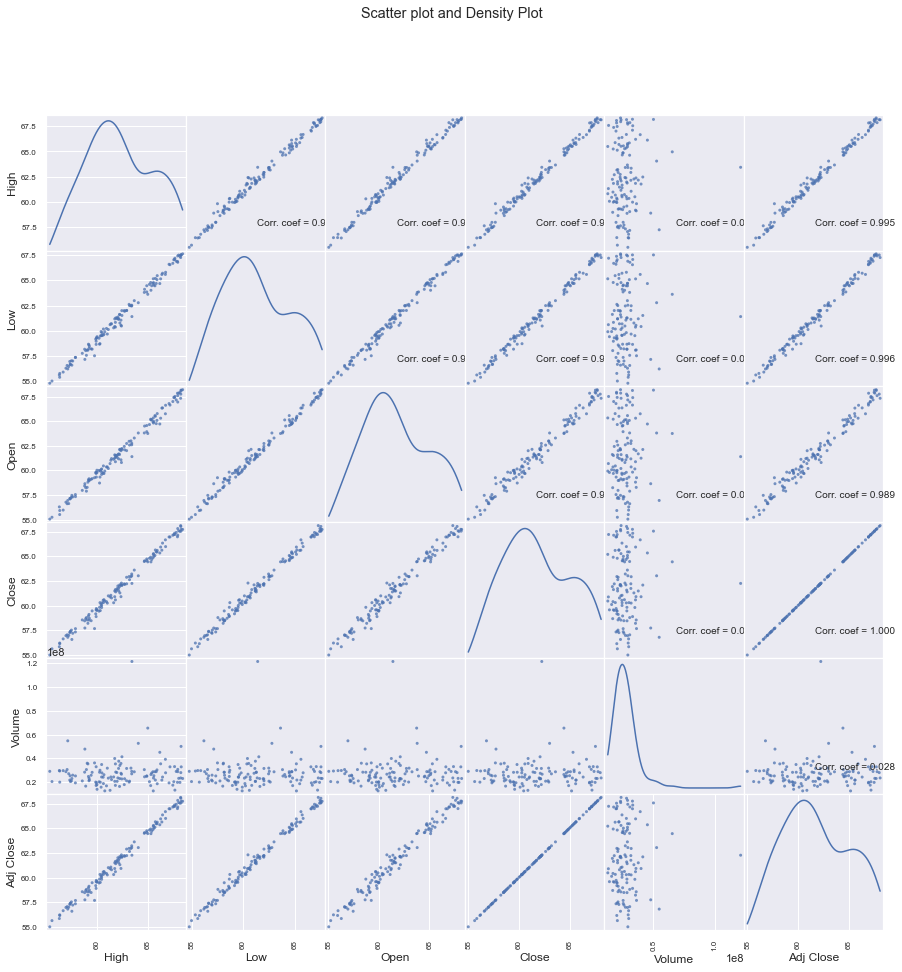

In [356]:
ScatterMatrix(google_stock, 15, 10)

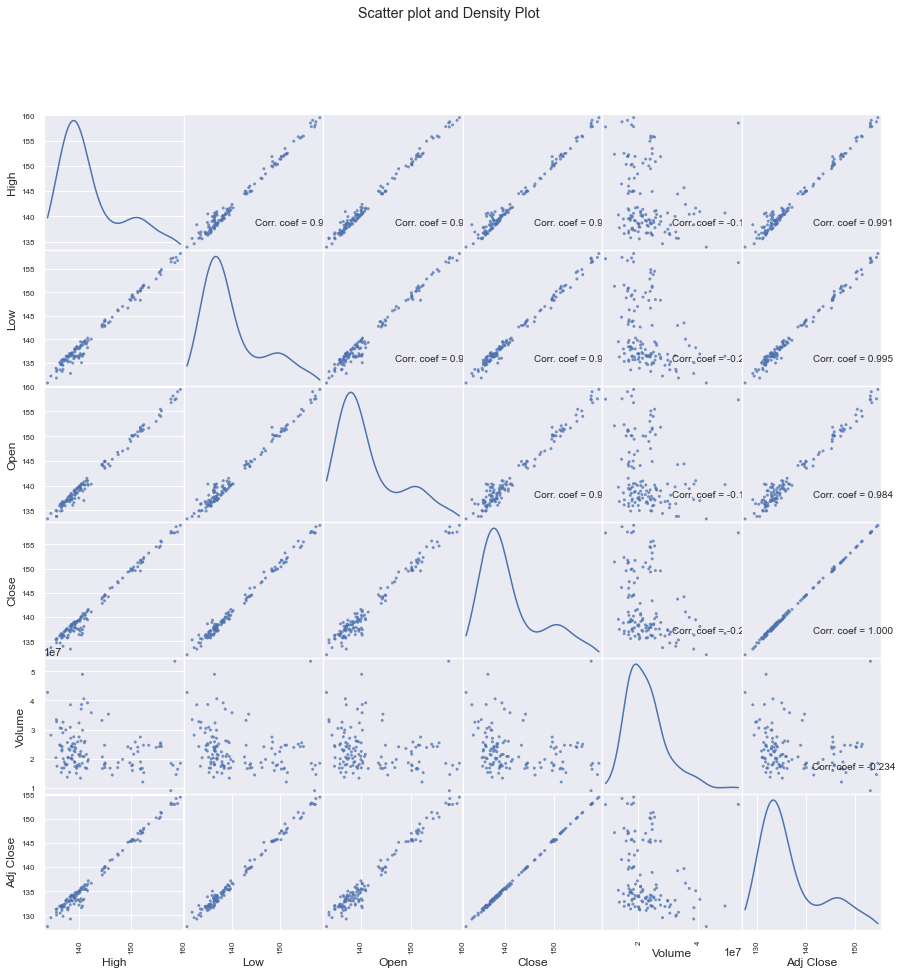

In [357]:
ScatterMatrix(microsoft_stock, 15, 10)

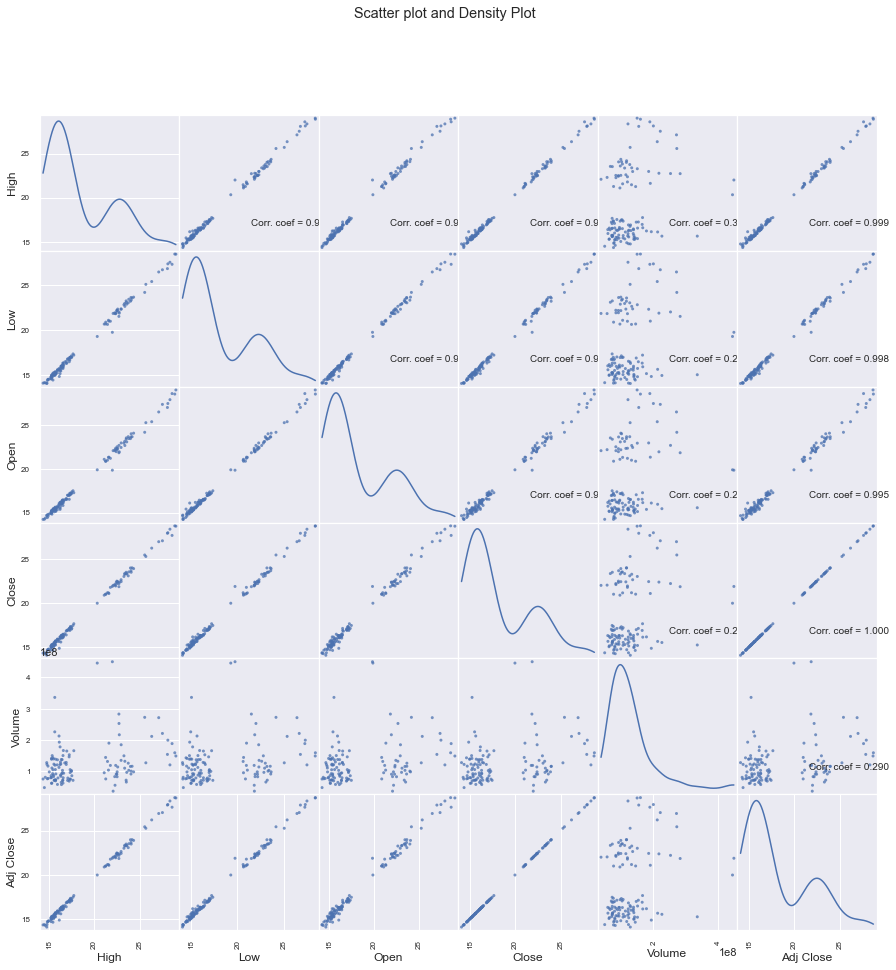

In [358]:
ScatterMatrix(tesla_stock, 15, 10)

From the Stocks Correlation Scatter Matrix we can observe that for all the stocks the the correlation coefficient for of volume with respect to Adjacent close or open is low.From this we can tell that they don't have a direct relation between them. However in the next step we will check if the Stock open or Adjacent price is also independent of tweet volume of particular stock.

On Tweets of each Company We try to find a date with max volume of tweets and try to find if the day with maximum tweets has any major impact on the stock price.

In [359]:
amzn_tweet.rename(columns={'post_date': 'Date'}, inplace=True)
amzn_tweet['Date'] = pd.to_datetime(amzn_tweet['Date']).dt.date
amzn_tweet.groupby(["Date"]).count().sort_values("tweet_id").groupby(level=0).tail()

,tweet_id,writer,body,comment_num,retweet_num,like_num,ticker_symbol
Date,,,,,,,
2019-07-15,36,36,36,36,36,36,36
2019-12-10,37,37,37,37,37,37,37
2019-10-22,79,79,79,79,79,79,79
2019-12-25,79,78,79,79,79,79,79
2019-10-06,93,92,93,93,93,93,93
...,...,...,...,...,...,...,...
2019-12-27,952,945,952,952,952,952,952
2019-07-25,956,949,956,956,956,956,956
2019-12-26,1296,1289,1296,1296,1296,1296,1296


In [360]:
import pandas_datareader as web
import datetime as dt

start = dt.datetime(2019,10,20)
end = dt.datetime(2019,10,30)

a_stock = web.DataReader('AMZN', 'yahoo', start, end)

a_stock = a_stock.reset_index()

Text(0.5, 1.0, 'Amazon_stock price when the volume of tweets were maximum')

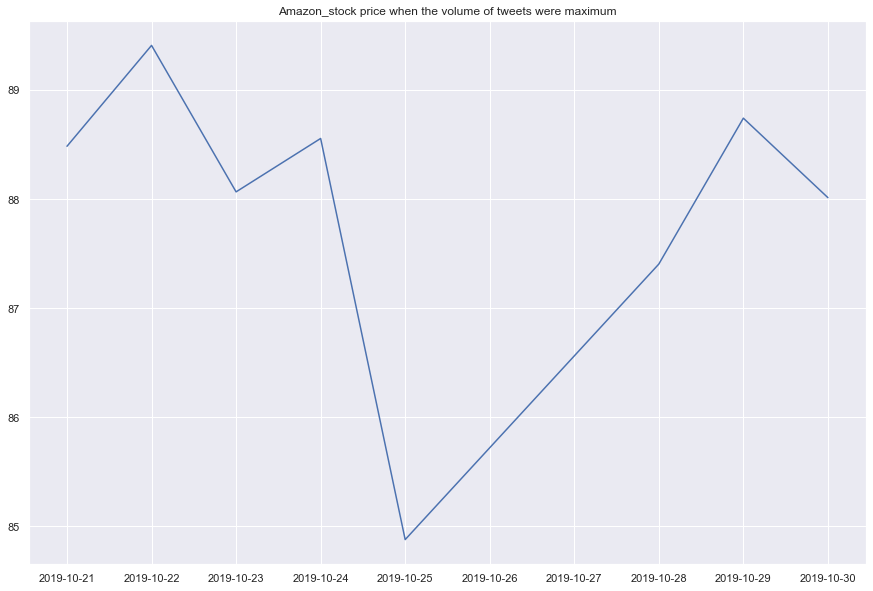

In [361]:
plt.figure(figsize=(15,10))
df=a_stock
plt.plot(a_stock['Date'],a_stock['Open'])
plt.title('Amazon_stock price when the volume of tweets were maximum')

In [362]:
apple_tweet.rename(columns={'post_date': 'Date'}, inplace=True)
apple_tweet['Date'] = pd.to_datetime(apple_tweet['Date']).dt.date
apple_tweet.groupby(["Date"]).count().sort_values("tweet_id").groupby(level=0).tail()

,tweet_id,writer,body,comment_num,retweet_num,like_num,ticker_symbol
Date,,,,,,,
2019-11-02,105,105,105,105,105,105,105
2019-11-24,187,180,187,187,187,187,187
2019-07-23,222,220,222,222,222,222,222
2019-10-13,304,289,304,304,304,304,304
2019-11-03,304,300,304,304,304,304,304
...,...,...,...,...,...,...,...
2019-12-23,2545,2513,2545,2545,2545,2545,2545
2019-10-25,2570,2538,2570,2570,2570,2570,2570
2019-10-24,2760,2704,2760,2760,2760,2760,2760


In [363]:
import pandas_datareader as web
import datetime as dt

start = dt.datetime(2019,11,18)
end = dt.datetime(2019,11,27)

ap_stock = web.DataReader('AAPL', 'yahoo', start, end)

ap_stock = ap_stock.reset_index()

Text(0.5, 1.0, 'Apple_stock price when the volume of tweets were maximum')

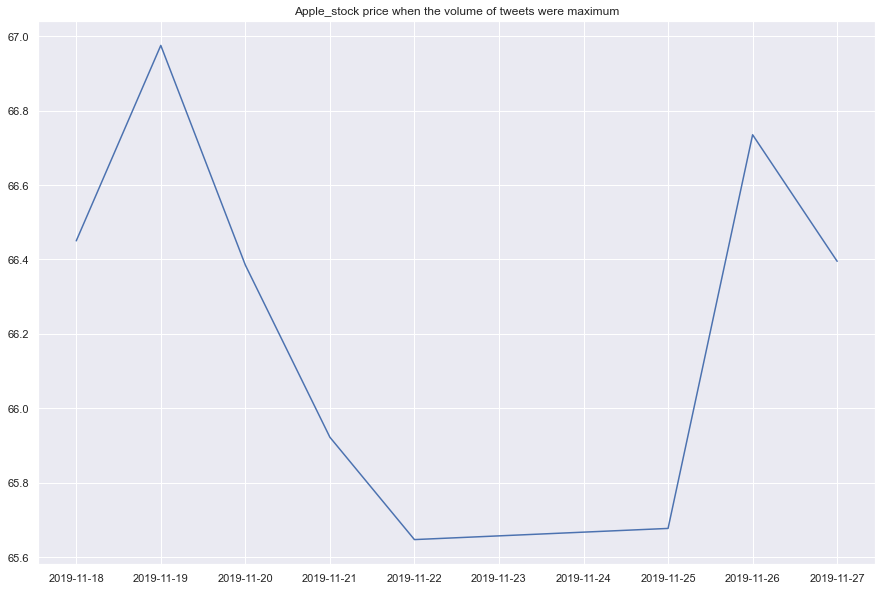

In [364]:
plt.figure(figsize=(15,10))
df=ap_stock
plt.plot(ap_stock['Date'],ap_stock['Open'])
plt.title('Apple_stock price when the volume of tweets were maximum')

In [365]:
google_tweet.rename(columns={'post_date': 'Date'}, inplace=True)
google_tweet['Date'] = pd.to_datetime(google_tweet['Date']).dt.date
google_tweet.groupby(["Date"]).count().sort_values("tweet_id").groupby(level=0).tail()

,tweet_id,writer,body,comment_num,retweet_num,like_num,ticker_symbol
Date,,,,,,,
2019-09-01,33,33,33,33,33,33,33
2019-12-25,39,39,39,39,39,39,39
2019-08-31,43,43,43,43,43,43,43
2019-08-25,43,42,43,43,43,43,43
2019-07-16,46,46,46,46,46,46,46
...,...,...,...,...,...,...,...
2019-09-19,583,581,583,583,583,583,583
2019-10-28,600,596,600,600,600,600,600
2019-07-19,730,722,730,730,730,730,730


Text(0.5, 1.0, 'Google_stock price when the volume of tweets were maximum')

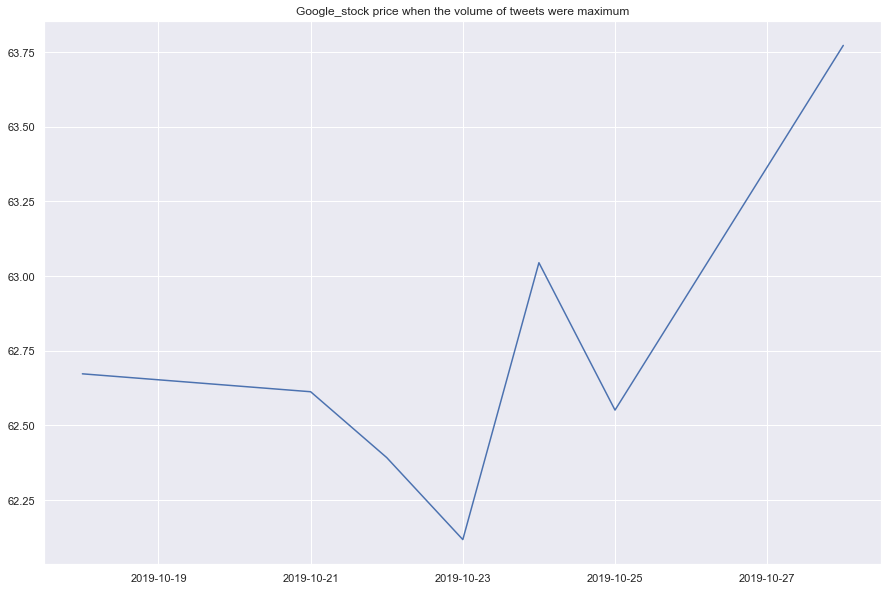

In [366]:
start = dt.datetime(2019,10,18)
end = dt.datetime(2019,10,28)

g_stock = web.DataReader('GOOG', 'yahoo', start, end)

g_stock = g_stock.reset_index()

plt.figure(figsize=(15,10))
df=g_stock
plt.plot(g_stock['Date'],g_stock['Open'])
plt.title('Google_stock price when the volume of tweets were maximum')

In [367]:
microsoft_tweet.rename(columns={'post_date': 'Date'}, inplace=True)
microsoft_tweet['Date'] = pd.to_datetime(microsoft_tweet['Date']).dt.date
microsoft_tweet.groupby(["Date"]).count().sort_values("tweet_id").groupby(level=0).tail()

,tweet_id,writer,body,comment_num,retweet_num,like_num,ticker_symbol
Date,,,,,,,
2019-11-30,57,57,57,57,57,57,57
2019-12-25,80,77,80,80,80,80,80
2019-12-01,81,81,81,81,81,81,81
2019-12-15,81,80,81,81,81,81,81
2019-11-24,83,82,83,83,83,83,83
...,...,...,...,...,...,...,...
2019-11-01,540,539,540,540,540,540,540
2019-10-29,757,749,757,757,757,757,757
2019-07-25,1020,1011,1020,1020,1020,1020,1020


In [368]:
start = dt.datetime(2019,10,23)
end = dt.datetime(2019,11,2)

m_stock = web.DataReader('MSFT', 'yahoo', start, end)

m_stock = m_stock.reset_index()

Text(0.5, 1.0, 'Microsoft_stock price when the volume of tweets were maximum')

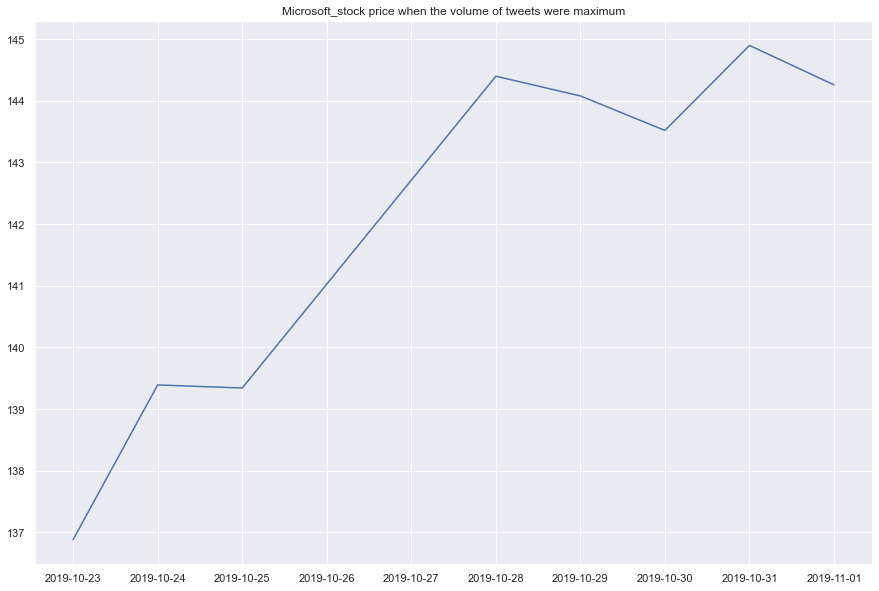

In [369]:
plt.figure(figsize=(15,10))
df=m_stock
plt.plot(m_stock['Date'],m_stock['Open'])
plt.title('Microsoft_stock price when the volume of tweets were maximum')

In [370]:
tesla_tweet.rename(columns={'post_date': 'Date'}, inplace=True)
tesla_tweet['Date'] = pd.to_datetime(tesla_tweet['Date']).dt.date
tesla_tweet.groupby(["Date"]).count().sort_values("tweet_id").groupby(level=0).tail()

,tweet_id,writer,body,comment_num,retweet_num,like_num,ticker_symbol
Date,,,,,,,
2019-12-11,46,46,46,46,46,46,46
2019-11-22,78,78,78,78,78,78,78
2019-10-19,90,88,90,90,90,90,90
2019-10-29,101,60,101,101,101,101,101
2019-07-21,124,123,124,124,124,124,124
...,...,...,...,...,...,...,...
2019-09-13,1077,1071,1077,1077,1077,1077,1077
2019-09-11,1377,1368,1377,1377,1377,1377,1377
2019-10-30,1512,1507,1512,1512,1512,1512,1512


In [371]:
start = dt.datetime(2019,7,25)
end = dt.datetime(2019,8,5)

t_stock = web.DataReader('TSLA', 'yahoo', start, end)

t_stock = t_stock.reset_index()

Text(0.5, 1.0, 'tesla_stock price when the volume of tweets were maximum')

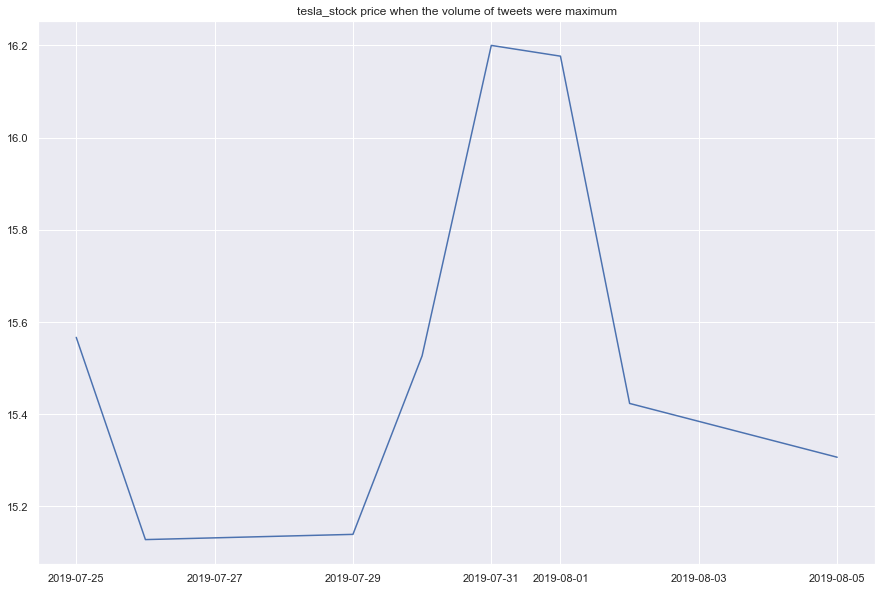

In [372]:
plt.figure(figsize=(15,10))
df=t_stock
plt.plot(t_stock['Date'],t_stock['Open'])
plt.title('tesla_stock price when the volume of tweets were maximum')

According to our graphs we can tell that Amazon and Google have a valid impact on the stock.As there is a drastic change in stock between its neighbor days.

Correlation and Covariance matrices for all stocks

In [382]:
amzn_stock.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.987981,0.989077,0.989996,0.136068,0.989996
Low,0.987981,1.000000,0.988489,0.987965,0.020199,0.987965
Open,0.989077,0.988489,1.000000,0.973371,0.072747,0.973371
Close,0.989996,0.987965,0.973371,1.000000,0.090418,1.000000
Volume,0.136068,0.020199,0.072747,0.090418,1.000000,0.090418
Adj Close,0.989996,0.987965,0.973371,1.000000,0.090418,1.000000


In [383]:
amzn_stock.cov()

,High,Low,Open,Close,Volume,Adj Close
High,1.563497e+01,1.527482e+01,1.537888e+01,1.549002e+01,1.220612e+07,1.549002e+01
Low,1.527482e+01,1.528827e+01,1.519838e+01,1.528589e+01,1.791762e+06,1.528589e+01
Open,1.537888e+01,1.519838e+01,1.546295e+01,1.514588e+01,6.489867e+06,1.514588e+01
Close,1.549002e+01,1.528589e+01,1.514588e+01,1.565814e+01,8.117055e+06,1.565814e+01
Volume,1.220612e+07,1.791762e+06,6.489867e+06,8.117055e+06,5.146939e+14,8.117055e+06
Adj Close,1.549002e+01,1.528589e+01,1.514588e+01,1.565814e+01,8.117055e+06,1.565814e+01


In [384]:
apple_stock.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.997487,0.998524,0.998020,0.025118,0.998023
Low,0.997487,1.000000,0.997956,0.998199,-0.025688,0.998191
Open,0.998524,0.997956,1.000000,0.996492,0.006059,0.996517
Close,0.998020,0.998199,0.996492,1.000000,-0.012883,0.999954
Volume,0.025118,-0.025688,0.006059,-0.012883,1.000000,-0.012804
Adj Close,0.998023,0.998191,0.996517,0.999954,-0.012804,1.000000


In [385]:
apple_stock.cov()

,High,Low,Open,Close,Volume,Adj Close
High,4.886033e+01,4.866702e+01,4.858700e+01,4.928138e+01,7.083267e+06,4.898047e+01
Low,4.866702e+01,4.871907e+01,4.848914e+01,4.921890e+01,-7.233550e+06,4.891787e+01
Open,4.858700e+01,4.848914e+01,4.845817e+01,4.900299e+01,1.701748e+06,4.870491e+01
Close,4.928138e+01,4.921890e+01,4.900299e+01,4.990345e+01,-3.671609e+06,4.959635e+01
Volume,7.083267e+06,-7.233550e+06,1.701748e+06,-3.671609e+06,1.627613e+15,-3.626914e+06
Adj Close,4.898047e+01,4.891787e+01,4.870491e+01,4.959635e+01,-3.626914e+06,4.929567e+01


In [386]:
google_stock.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.994957,0.994512,0.995084,0.062506,0.995084
Low,0.994957,1.000000,0.995017,0.995693,0.007356,0.995693
Open,0.994512,0.995017,1.000000,0.988741,0.019325,0.988741
Close,0.995084,0.995693,0.988741,1.000000,0.028186,1.000000
Volume,0.062506,0.007356,0.019325,0.028186,1.000000,0.028186
Adj Close,0.995084,0.995693,0.988741,1.000000,0.028186,1.000000


In [387]:
google_stock.cov()

,High,Low,Open,Close,Volume,Adj Close
High,1.206381e+01,12.236702,12.121547,1.206108e+01,2.579160e+06,1.206108e+01
Low,1.223670e+01,12.538217,12.363858,1.230347e+01,3.094185e+05,1.230347e+01
Open,1.212155e+01,12.363858,12.314347,1.210800e+01,8.056283e+05,1.210800e+01
Close,1.206108e+01,12.303467,12.107999,1.217779e+01,1.168511e+06,1.217779e+01
Volume,2.579160e+06,309418.528950,805628.310429,1.168511e+06,1.411323e+14,1.168511e+06
Adj Close,1.206108e+01,12.303467,12.107999,1.217779e+01,1.168511e+06,1.217779e+01


In [388]:
microsoft_stock.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.991860,0.994944,0.990908,-0.167629,0.991012
Low,0.991860,1.000000,0.989807,0.995033,-0.244059,0.994917
Open,0.994944,0.989807,1.000000,0.983483,-0.186005,0.984116
Close,0.990908,0.995033,0.983483,1.000000,-0.234970,0.999577
Volume,-0.167629,-0.244059,-0.186005,-0.234970,1.000000,-0.234181
Adj Close,0.991012,0.994917,0.984116,0.999577,-0.234181,1.000000


In [389]:
microsoft_stock.cov()

,High,Low,Open,Close,Volume,Adj Close
High,4.478078e+01,4.660898e+01,4.501088e+01,4.589364e+01,-8.151695e+06,4.615681e+01
Low,4.660898e+01,4.931132e+01,4.698906e+01,4.835977e+01,-1.245441e+07,4.862631e+01
Open,4.501088e+01,4.698906e+01,4.570316e+01,4.601645e+01,-9.138003e+06,4.630525e+01
Close,4.589364e+01,4.835977e+01,4.601645e+01,4.790123e+01,-1.181787e+07,4.815047e+01
Volume,-8.151695e+06,-1.245441e+07,-9.138003e+06,-1.181787e+07,5.280903e+13,-1.184450e+07
Adj Close,4.615681e+01,4.862631e+01,4.630525e+01,4.815047e+01,-1.184450e+07,4.844201e+01


In [390]:
tesla_stock.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.997817,0.997537,0.998680,0.301424,0.998680
Low,0.997817,1.000000,0.998317,0.997653,0.257379,0.997653
Open,0.997537,0.998317,1.000000,0.995146,0.269224,0.995146
Close,0.998680,0.997653,0.995146,1.000000,0.290277,1.000000
Volume,0.301424,0.257379,0.269224,0.290277,1.000000,0.290277
Adj Close,0.998680,0.997653,0.995146,1.000000,0.290277,1.000000


In [391]:
tesla_stock.cov()

,High,Low,Open,Close,Volume,Adj Close
High,1.655316e+01,1.611011e+01,1.620707e+01,1.641535e+01,8.102497e+07,1.641535e+01
Low,1.611011e+01,1.574760e+01,1.582017e+01,1.599449e+01,6.748086e+07,1.599449e+01
Open,1.620707e+01,1.582017e+01,1.594668e+01,1.605482e+01,7.103131e+07,1.605482e+01
Close,1.641535e+01,1.599449e+01,1.605482e+01,1.632177e+01,7.748115e+07,1.632177e+01
Volume,8.102497e+07,6.748086e+07,7.103131e+07,7.748115e+07,4.365169e+15,7.748115e+07
Adj Close,1.641535e+01,1.599449e+01,1.605482e+01,1.632177e+01,7.748115e+07,1.632177e+01
